# Data Analysis on Video Game Sales

## Visualization Data

## Final Objective
**Predict Japanese Sales using North America, European and Other Sales, Genre and Platform.**
> This result is important for games that want to enter the Japenese Market, but don't know what to expect for their respective sales team. Also, it will be a good measure to invest (or not) in japanese translations.

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing Data

In [3]:
path = "../Data/visualizations_sales.csv"

In [4]:
visualization_df = pd.read_csv(path, index_col=0)

In [5]:
visualization_df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Plots

### Numerical Analysis

- **Plotting Top 15 Publishers and their respective Global Sales Amount**

In [6]:
df_globalsales_by_publisher = visualization_df.copy()
df_globalsales_by_publisher = df_globalsales_by_publisher[["Publisher", "Global_Sales"]]
df_globalsales_by_publisher = pd.DataFrame(df_globalsales_by_publisher.groupby('Publisher')['Global_Sales'].sum())

In [7]:
top15_publishers_df = df_globalsales_by_publisher.sort_values(by="Global_Sales", ascending=False)[:15]

In [8]:
others_row = df_globalsales_by_publisher.sort_values(by="Global_Sales", ascending=False)[15:].sum()
others_row.index = ["Others"]

In [9]:
top15_copy = pd.concat([top15_publishers_df, others_row])
top15_copy.loc["Others"]["Global_Sales"] = top15_copy.loc["Others"][0]
top15_publishers_df = top15_copy.drop(0, axis="columns")

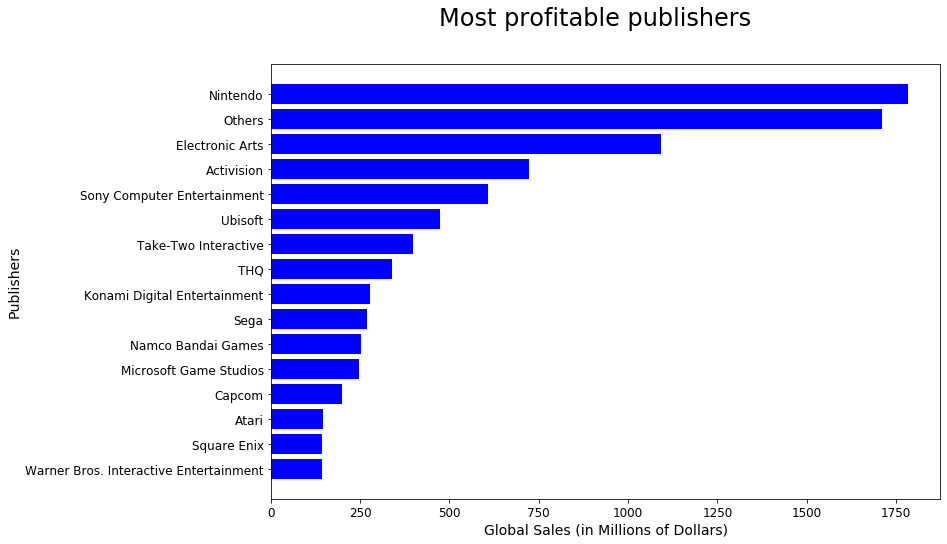

In [42]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle("Most profitable publishers", fontsize=24)
ax.barh(top15_publishers_df.sort_values(by="Global_Sales", ascending=True).index, top15_publishers_df.sort_values(by="Global_Sales", ascending=True).Global_Sales, color='b')

plt.tick_params(labelsize=12);
plt.ylabel("Publishers", fontsize=14)
plt.xlabel("Global Sales (in Millions of Dollars)", fontsize=14)
plt.show()

- **Plotting Global Sales overtime**

In [30]:
df_globalsales_by_year = visualization_df.copy()
df_globalsales_by_year = df_globalsales_by_year[["Year", "Global_Sales"]]
df_globalsales_by_year = pd.DataFrame(df_globalsales_by_year.groupby('Year')['Global_Sales'].sum())

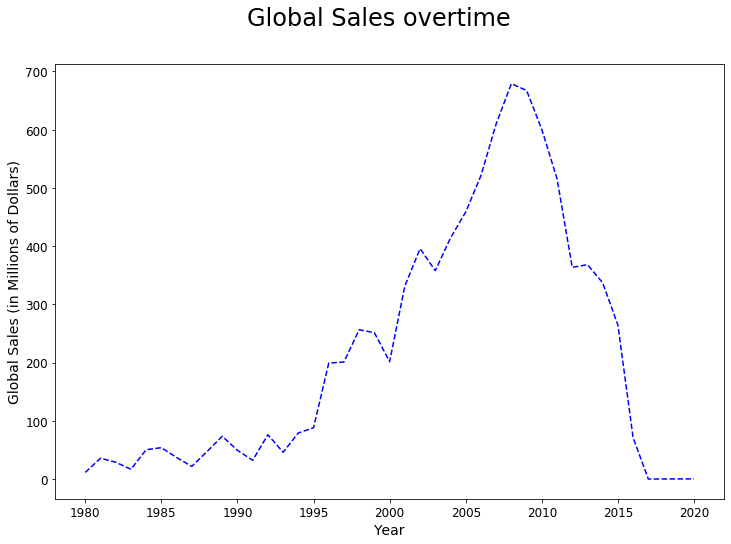

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle("Global Sales overtime", fontsize=24)
ax.plot(df_globalsales_by_year.Global_Sales, 'b--')
ax.axis('auto')

plt.tick_params(labelsize=12);
plt.ylabel("Global Sales (in Millions of Dollars)", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.show()

**OBS**

It's important to understand that this plot gives us a good information abour our historical data, containing sufficient values until 2010.

- **Plotting Japanese Sales overtime**

In [32]:
df_jpsales_by_year = visualization_df.copy()
df_jpsales_by_year = df_jpsales_by_year[["Year", "JP_Sales"]]
df_jpsales_by_year = pd.DataFrame(df_jpsales_by_year.groupby('Year')['JP_Sales'].sum())

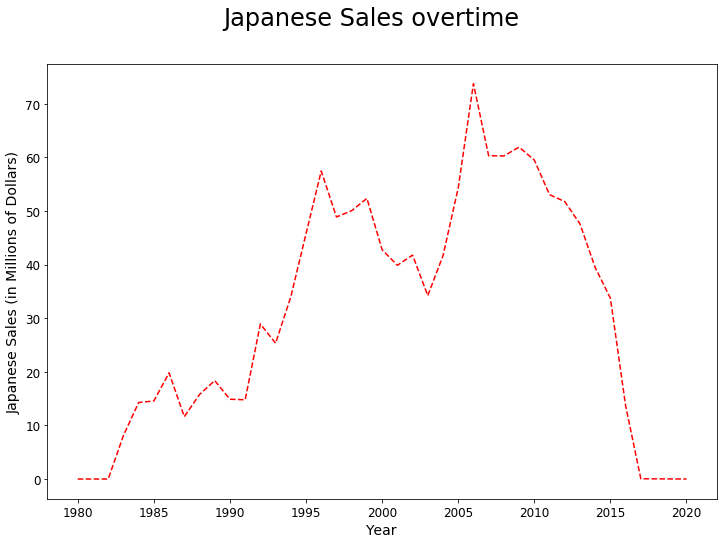

In [44]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle("Japanese Sales overtime", fontsize=24)
ax.plot(df_jpsales_by_year.JP_Sales, 'r--')
ax.axis('auto')

plt.tick_params(labelsize=12);
plt.ylabel("Japanese Sales (in Millions of Dollars)", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.show()

- **Plotting JP, EU and NA Sales overtime**

In [34]:
df_allsales_by_year = visualization_df.copy()
df_allsales_by_year = df_allsales_by_year[["Year", "NA_Sales", "EU_Sales", "JP_Sales"]]
df_allsales_by_year = pd.DataFrame(df_allsales_by_year.groupby('Year')['NA_Sales', 'EU_Sales', 'JP_Sales'].sum())

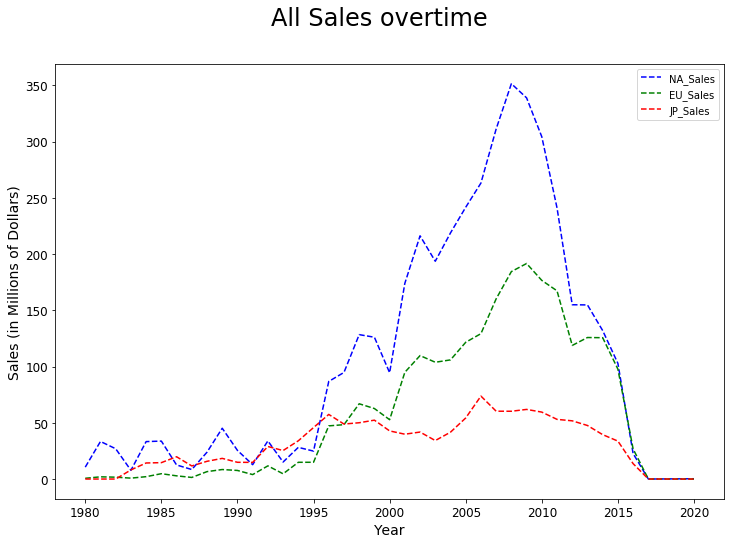

In [45]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle("All Sales overtime", fontsize=24)
ax.plot(df_allsales_by_year.NA_Sales, 'b--', label="NA_Sales")
ax.plot(df_allsales_by_year.EU_Sales, 'g--', label="EU_Sales")
ax.plot(df_allsales_by_year.JP_Sales, 'r--', label="JP_Sales")
plt.legend()
ax.axis('auto')

plt.tick_params(labelsize=12);
plt.ylabel("Sales (in Millions of Dollars)", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.show()

**OBS**

So, as we can see, all sales curves have a spike at 2008-2009 and then start falling due to lack of data.

- **Plotting Genre Distribution overtime**

In [36]:
df_genres_count = visualization_df.copy()
df_genres_count = df_genres_count.Genre.value_counts()

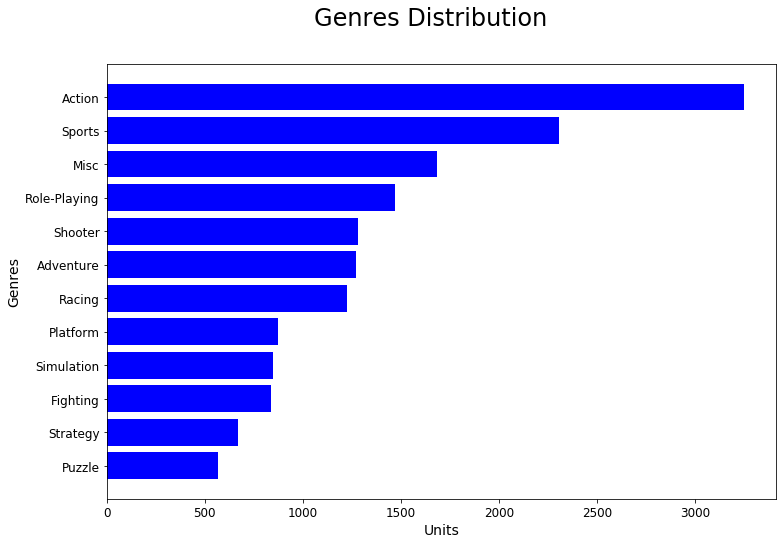

In [46]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle("Genres Distribution", fontsize=24)
ax.barh(df_genres_count.index[-1::-1], df_genres_count[-1::-1], color='b')
ax.axis('auto')

plt.tick_params(labelsize=12);
plt.ylabel("Genres", fontsize=14)
plt.xlabel("Units", fontsize=14)
plt.show()

- **Plotting Global Sales based on Genres overtime**

In [161]:
df_globalsales_by_genres = visualization_df.copy()
df_globalsales_by_genres = df_globalsales_by_genres[["Year", "Genre", "Global_Sales"]]
df_globalsales_by_genres = pd.DataFrame(df_globalsales_by_genres.groupby(['Genre', 'Year'])['Global_Sales'].sum())